<h1><center> Skóre kreativity dle typu motivace </center></h1>
<center> AR 2021/22 </center>

In [1]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=3)
from sympy import *
from scipy.stats import norm, uniform, expon, t
from scipy.optimize import minimize

In [2]:
K = 3
L = 8
print("M = " + str((((K + L) * 47) % 11) + 1))

M = 1


V našem případě tedy budeme zpracovávat dataset `case0101`

---
---
## Úloha 1 ##

> (1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

Dataset obsahuje data z experimentu týkajícího se účinků vnitřní a vnější motivace na kreativitu. Subjekty se značnými zkušenostmi s tvůrčím psaním byly náhodně přiřazeny do jedné ze dvou skupin.

Dataset obsahuje 47 pozorování, každé z pozorování má následující údaje:

<ol>
<li> "Score" - skóre kreativity daného subjetku </li>
<li> "Treatment" - označuje, do které skupiny byl zařazen daný subjekt, tedy jaké motivaci byl subjekt vystaven - vnitřní nebo vnější
  <ul>
    <li> Muže být buď "Extristic" (vnější) nebo "Intristic" (vnitřní) </li>
  </ul>
</li>
</ol>

Nejprve data načteme a rozdělíme je na 2 zkoumané skupiny - extrinsic a intrinsic:

In [3]:
path = './case0101.csv'
df = pd.read_csv(path, sep = ";", decimal = ",")
extrinsic = df[df["Treatment"] == "Extrinsic"]
intrinsic = df[df["Treatment"] == "Intrinsic"]

Náhled zkoumaných dat:

In [4]:
def datasetsInfo(data, text):
    print(f"Skupina {text}:")
    display(data.head(3), data.tail(3))
    print(f"Velikost skupiny {text} je " + str(len(data)) + ".")

In [5]:
datasetsInfo(extrinsic, "extrinsic")

Skupina extrinsic:


,Score,Treatment
0,5.0,Extrinsic
1,5.4,Extrinsic
2,6.1,Extrinsic


,Score,Treatment
20,21.200001,Extrinsic
21,22.100000,Extrinsic
22,24.000000,Extrinsic


Velikost skupiny extrinsic je 23.


In [6]:
datasetsInfo(intrinsic, "intrinsic")

Skupina intrinsic:


,Score,Treatment
23,12.0,Intrinsic
24,12.0,Intrinsic
25,12.9,Intrinsic


,Score,Treatment
44,24.299999,Intrinsic
45,26.700001,Intrinsic
46,29.700001,Intrinsic


Velikost skupiny intrinsic je 24.


Celková velikost vzorku je tedy 47.

Teď pro každou skupinu zvlášť odhadneme střední hodnotu, rozptyl a medián příslušného rozdělení.

Víme, že odhadem střední hodnoty je aritmetický průměr. Pro jeho výpočet vytvoříme funkci `meanValEstimate()`. Aritmetický průměr se počítá pomocí vzorce:

$$
\begin{align}
\widehat{EX} = \overset{\_}{X_{n}} = \frac{1}{n} \cdot \sum_{k = 1}^{n}{X_{k}}
\end{align}
$$

In [7]:
def meanValEstimate(data):
    return data.mean()

Pro odhad rozptylu vytvoříme funkci `meanValVarEstimate()`, odhad rozptylu se počítá pomocí vzorce:

$$
\begin{align}
\widehat{var(X)} = s_{n}^2 = \frac{1}{n - 1} \cdot \sum_{k = 1}^{n}({X_{k}} - \overset{\_}{X_{n}})^2
\end{align}
$$

In [8]:
def meanValVarEstimate(data):
    return data.var()

Pro výpočet mediánu vytvoříme funkci `median()`, medián se počítá pomocí vzorce:

$$
\begin{equation}
median(X_{n})=
\begin{cases}
          x_{\lfloor\frac{n}{2}\rfloor}; \space n\ mod\ 2 = 1 \\
          \frac{x_{\frac{n - 2}{2}} + x_{\frac{n}{2}}}{2}; \space n\ mod\ 2 = 0 \\
     \end{cases}
\end{equation}
$$

In [9]:
def median(data):
    return data.median()

In [10]:
def printValues(data, text):
    print(f'Odhadem střední hodnoty skupiny {text} je hodnota ' + str(meanValEstimate(data)))
    print(f'Odhadem rozptylu skupiny {text} je hodnota ' + str(meanValVarEstimate(data)))
    print(f'Medián skupiny {text} je hodnota ' + str(median(data)))

In [11]:
printValues(intrinsic["Score"], "intrinsic")

Odhadem střední hodnoty skupiny intrinsic je hodnota 19.883333444595333
Odhadem rozptylu skupiny intrinsic je hodnota 19.709276198788285
Medián skupiny intrinsic je hodnota 20.399999618530252


In [12]:
printValues(extrinsic["Score"], "extrinsic")

Odhadem střední hodnoty skupiny extrinsic je hodnota 15.739130642103135
Odhadem rozptylu skupiny extrinsic je hodnota 27.58976452902866
Medián skupiny extrinsic je hodnota 17.2000007629395


---
## Úloha 2 ##

> (1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

Funkce `showApproximationPlots()` vykresluje základní grafy, histogram, empirickou distribuční funkci a hustotu.

Pro vykreslení histogramu používáme funkci `hist()`, v parametrech pak upravujeme šířku sloupečků pomocí bins. `density = True` pak škáluje osu `Y` na interval `0-1`.

Empirickou distribuční funkci vykreslujeme podobně jako histogram, akorát s rozdílem, že nastavujeme parametr `cumulative = True`, tím získáme distribuční funkci.

Poslední graf vykreslujeme pomocí funkce `density()`, která přímo vykreslí graf odhadu hustoty.

In [13]:
def showApproximationPlots(data, text, barWidth, start, end):
    data.plot.hist(bins = [ i * barWidth for i in range(start, end) ], density = True,
                   title = f"Histogram skóre skupiny {text}", alpha = 0.7, edgecolor = "w")
    data.plot.hist(cumulative = True, density = True, title = f"Empirická distribuční funkce skóre skupiny {text}",
                  alpha = 0.7, edgecolor = "w")
    data.plot.density(title = f"Hustota skóre skupiny {text}", linewidth = 3, alpha = 0.7)

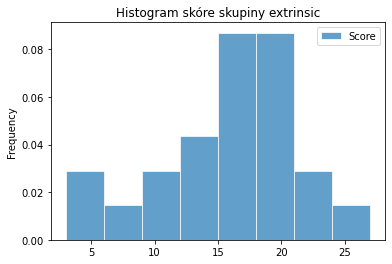

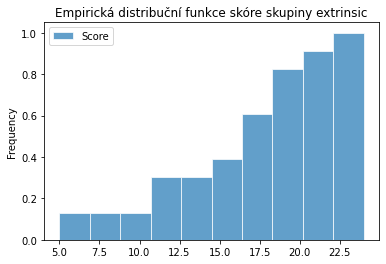

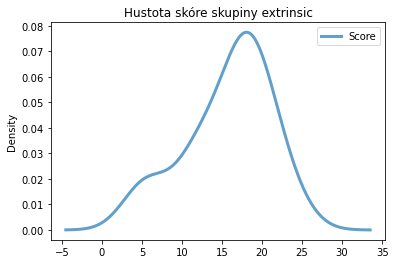

In [14]:
showApproximationPlots(extrinsic, "extrinsic", 3, 1, 10)

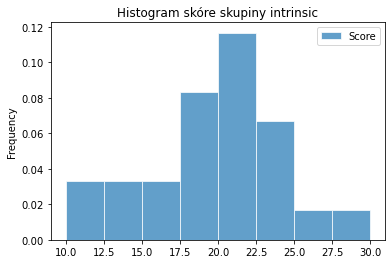

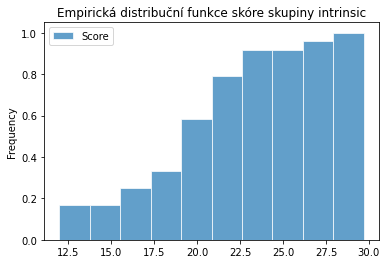

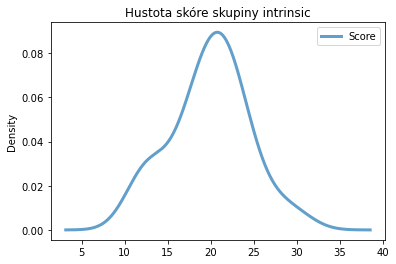

In [15]:
showApproximationPlots(intrinsic, "intrinsic", 2.5, 4, 13)

---
## Úloha 3 ##

> (3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

Všechny odhady budeme dělat pomocí momentové metody.

In [16]:
def showDistributions(dataframe, text, start, end):
    f, X  = plt.subplots(figsize = (8, 6))
    X.set_title(f"Ilustrace různých rozdělení na datech - {text}")

    X.hist(dataframe["Score"], bins = [ i * 2.5 for i in range(start, end) ],
           density = True, alpha = 0.125, color = 'black', edgecolor = "black")

    #Získání odhadů 
    mean = meanValEstimate(dataframe["Score"])
    sd = np.sqrt(meanValVarEstimate(dataframe["Score"]))
    xmin, xmax = plt.xlim()
    vector = np.linspace(xmin, xmax, 1000)

    #Norm   
    yNorm = norm.pdf(vector, mean, sd)
    X.plot(vector, yNorm, linewidth = 3, color = 'r', label = "Normální rozdělení")

    #Expon
    lambdaData = 1 / mean
    yExpon = expon.pdf(vector, scale = 1 / lambdaData)
    X.plot(vector, yExpon, linewidth = 3, color = 'b', label = "Exponenciální rozdělení")

    #Uniform
    m1 = np.mean(dataframe["Score"])
    m2 = meanValVarEstimate(dataframe["Score"]) + (np.mean(dataframe["Score"])**2)

    a = m1 - np.sqrt(3 * (m2 - m1**2))
    b = m1 + np.sqrt(3 * (m2 - m1**2))
    
    yUniform = uniform.pdf(vector, a, b - a)
    
    firstSplitIndex = 0
    secondSplitIndex = 0
    for i in range(len(yUniform)):
        if (firstSplitIndex == 0 and yUniform[i] != 0):
            firstSplitIndex = i
        elif (firstSplitIndex != 0 and secondSplitIndex == 0 and yUniform[i] == 0):
            secondSplitIndex = i
        
    X.plot(vector[firstSplitIndex : secondSplitIndex], yUniform[firstSplitIndex : secondSplitIndex],
           linewidth = 3, color = 'g', label = "Rovnoměrné rozdělení")
    
    X.plot(vector[0 : firstSplitIndex], yUniform[0 : firstSplitIndex] + 0.0005, linewidth = 3, color = 'g')
    X.plot(vector[secondSplitIndex :], yUniform[secondSplitIndex :] + 0.0005, linewidth = 3, color = 'g')

    X.legend()

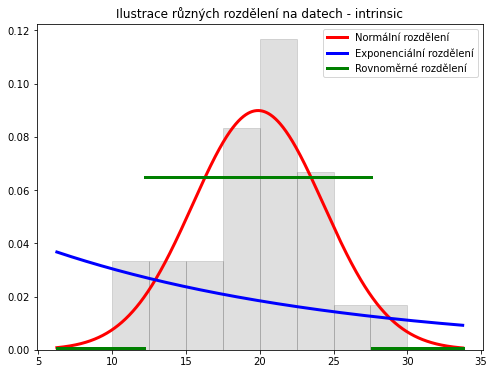

In [17]:
showDistributions(intrinsic, "intrinsic", 3, 14)

Vidíme, že vzorky této skupiny se nejvíc přibližují normálnímu rozdělení.

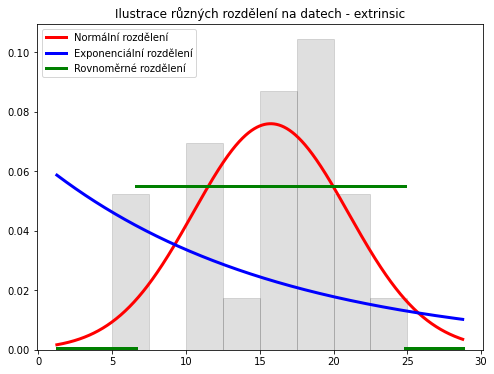

In [18]:
showDistributions(extrinsic, "extrinsic", 1, 12)

Vidíme, že i vzorky této skupiny se nejvíc přibližují normálnímu rozdělení.

#### Na základě grafů jsme odhadli, že se u obou vzorků jedná o normální rozdělení. #### 

#### Postup odhadu: ####

Nejprve jsme připravili histogram pro znázornění hustoty různých rozdělení.
Dále jsme si připravili odhad střední hodnoty jako průměr a výběrovou směrodatnou odchylku, jakožto odmocninu z výběrového rozptylu.
Do proměnné `vector` jsme si uložili sekvenci souřadnic pro vykreslení grafů.

#### Normální rozdělení ####
U tohoto rozdělení jsme si vytvořili proměnnou `yNorm` do které jsme přiřadili výstup funkce `norm.pdf()`, která generuje body normálního rozdělení, dle zadaných parametrů, což konkrétně byly odhady střední hodnoty a výběrová směrodatná odchylka. Poté už jsme jen vykreslili křivku a přidali ji do grafu

#### Exponenciální rozdělení ####
Nedříve jsme museli udělat odhad pro lambdu, který je dle momentové metody 1/průměr (odhad střední hodnoty). Poté jsme postupovali podobně jak v předchozím rozdělení, jen jsme na vygenerování bodů použili funkci `expon.pdf()` s patřičnými parametry.

#### Rovnoměrné rozdělení ####
Zde jsme vyvtořili proměnné `m1` a `m2`, které reprezentují 1. a 2. výběrový moment. Dále jsme na základě těchto momentů udělali odhad pro parametry `a`, `b`. Poté jsme využili funkci `uniform.pdf()` na vygenerování bodů rovnoměrného rozdělení.


---
## Úloha 4 ##

> (1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

Ze závěru předchozí úlohy (odhadnuté rozdělení - normální a jeho parametry) si vygenerujeme data pro normální rozdělení pomocí funkce `np.random.normal()`, která využívá knihovny `numpy` k vygenerování náhodných hodnot, parametry jsou jen střední hodnota, směrodatná odchylka a počet požadovaných hodnot. Dále pro tyto data vykreslíme graf a porovnáme s oběma skupinami.

In [19]:
def plotGauss(axis, muNorm, stdNorm):
    xmin, xmax = axis.get_xlim()
    vectorIntrisic = np.linspace(xmin, xmax, 100)
    yIntrisicNorm = norm.pdf(vectorIntrisic, muNorm, stdNorm)
    axis.plot(vectorIntrisic, yIntrisicNorm, linewidth = 4, color = [1, 0, 0, 0.5])
    
def showGenratedCompare(dataframe, text):
    muNorm = meanValEstimate(dataframe["Score"])
    stdNorm = np.sqrt(meanValVarEstimate(dataframe["Score"]))
    s = np.random.normal(muNorm, stdNorm, 100)

    f, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

    ax[0].hist(s, bins = 10, density = True, alpha = 0.5, color = 'b', edgecolor = 'b')
    ax[1].hist(dataframe["Score"], bins = 6, density = True, alpha = 0.6, color = 'g', edgecolor = 'g')

    plotGauss(ax[0], muNorm, stdNorm)
    plotGauss(ax[1], muNorm, stdNorm)

    ax[0].set_title(f"Náhodná data {text}")
    ax[1].set_title(f"Původní data {text}")

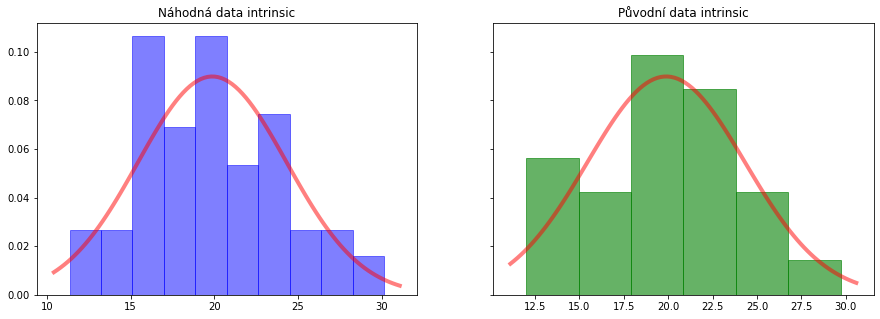

In [20]:
showGenratedCompare(intrinsic, "intrinsic")

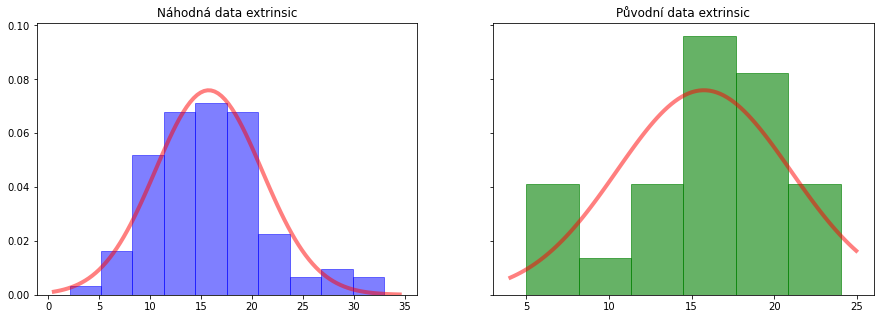

In [21]:
showGenratedCompare(extrinsic, "extrinsic")

Porovnáním  grafů jsme se utvrdili v názoru, že naše data pocházejí z normálního rozdělení.

---
## Úloha 5 ##

> (1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

Jelikož máme pouze výběrovou směrodatnou odchylku a aritmetický průměr, tak použijeme Studentovo rozdělení. Použijeme vzorec z přednášky pro oboustranný konfidenční interval, který používá Studentovo rozdělení:

$$
\begin{align}
\left( \overset{\_}{X_{n}} - \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}}, \overset{\_}{X_{n}} + \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}} \right)
\end{align}
$$

Do vzorce dosadíme naše data a tím interval vyčíslíme:

In [22]:
# Známe jen odhad rozptylu, tudíž použijeme studentovo rozdělení
def bilConfInterval(data, alpha): 
    mean = meanValEstimate(data)
    sd = sqrt(meanValVarEstimate(data))
    n = len(data)
    criticalVal = t.isf(alpha / 2, df = n - 1)
    criticalDelta = (criticalVal * sd) / math.sqrt(n)
    return [mean - criticalDelta, mean + criticalDelta]

def showConfInterval(bounds, data, text):
    print(f'Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu {text}:\n({bounds[0]}, {bounds[1]})')
    f, ax = plt.subplots()
    ax.hist(data, bins = 6, density = True, alpha = 0.6, color = 'b', edgecolor = 'b')
    ax.axvline(x = bounds[0], ymin = 0, ymax = 1, color = 'r', alpha = 0.75, linestyle = '-', lw = 3)
    ax.axvline(x = bounds[1], ymin = 0, ymax = 1, color = 'r', alpha = 0.75, linestyle = '-', lw = 3)
    ax.set_title(f"Zobrazení intervalu pro skupinu {text}:")

Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu intrinsic:
(18.0086914905740, 21.7579753986166)


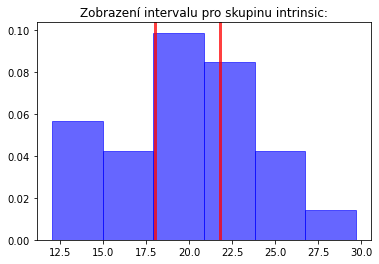

In [23]:
alpha = 0.05
showConfInterval(bilConfInterval(intrinsic["Score"], alpha), intrinsic["Score"], "intrinsic")

Oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu extrinsic:
(13.4677378113638, 18.0105234728425)


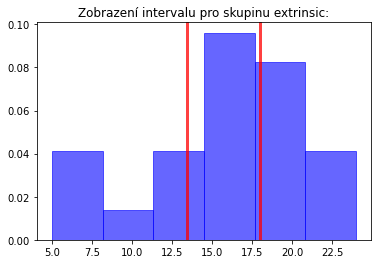

In [24]:
showConfInterval(bilConfInterval(extrinsic["Score"], alpha), extrinsic["Score"], "extrinsic")

Hodnoty mohou být trochu nepřesné, jelikož se počítalo ve strojových číslech.

---
## Úloha 6 ##

> (1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

Stanovili jsem si nulovou hypotézu a jeji alternativu pro obě skupiny s K = 3 takto:

$$
H_{0}: \mu = 3 \\
H_{A}: \mu \neq 3 \\
$$

Budeme ověřovat, zda nulová hypotéza platí na základě výsledků z přechozího úkolu. Čili budeme zkoumat, zda hodnota náleží intervalu spočteném pomocí funkce `bilConfInterval()`, která byla vytvořena v předchozím úkolu.

In [25]:
def isPossibleMean(interval, value):
    if value >= interval[0] and value <= interval[1]:
        return True
    return False

In [26]:
def refuseOrNot(alpha, interval, K, datasetName):
    refuse = not isPossibleMean(intervalIntrinsic, K)
    level = 100 - alpha * 100
    message = f'Nulovou hypotézu pro skupinu {datasetName}, že střední hodnota je rovná hodnotě {K}, na hladině významnosti ' + str(100 - level) + '% '
    if refuse:
        print(message + f'zamítáme ve prospěch alternativy, že střední hodnota není rovná hodnotě {K}.')
    else:
        print(message + f'nezamítáme.')

In [27]:
alpha = 0.05
intervalIntrinsic = bilConfInterval(intrinsic["Score"], alpha)
intervalExtrinsic = bilConfInterval(extrinsic["Score"], alpha)

In [28]:
refuseOrNot(alpha, intervalIntrinsic, K, 'intrinsic')

Nulovou hypotézu pro skupinu intrinsic, že střední hodnota je rovná hodnotě 3, na hladině významnosti 5.0% zamítáme ve prospěch alternativy, že střední hodnota není rovná hodnotě 3.


In [29]:
refuseOrNot(alpha, intervalExtrinsic, K, 'extrinsic')

Nulovou hypotézu pro skupinu extrinsic, že střední hodnota je rovná hodnotě 3, na hladině významnosti 5.0% zamítáme ve prospěch alternativy, že střední hodnota není rovná hodnotě 3.


---
## Úloha 7 ##

> (2b) Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

$$
H_{0}: \mu_{I} = \mu_{E} \\
H_{1}: \mu_{I} \neq \mu_{E}
$$

Vypočítáme si konfidenční intervaly na dané hladině (5%) a zkoumáme (pomocí funkce `intersrect()`), zda mají průnik.
Pokud průnik mají, nulovou hypotézu nezamítneme, pokud ne, hypotéza zamítnuta bude ve prospěch alternativy.

Volíme oboustranný interval, jelikož ověřujeme rovnost dvou hodnot.  Nedávalo by smysl zjišťovat, zda je jedna hodnota menší, resp. větší, než druhá

In [30]:
def intersect(a, b):
    return a[0] <= b[0] <= a[1] or b[0] <= a[0] <= b[1]

In [31]:
def refuseOrNotIntersect(alpha, interval1, interval2):
    level = 100 - alpha * 100
    message = f'Nulovou hypotézu, že se střední hodnoty rovnají, na hladině významnosti ' + str(100 - level) + '% '
    if not intersect(interval1, interval2):
        print(message + 'zamítáme ve prospěch alternativy, že se střední hodnoty nerovnají.')
    else:
        print(message + 'nezamítáme.')

In [32]:
refuseOrNotIntersect(alpha, intervalIntrinsic, intervalExtrinsic)

Nulovou hypotézu, že se střední hodnoty rovnají, na hladině významnosti 5.0% nezamítáme.
